In [24]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
clinical_trial_data

# Combine the data into a single dataset
trial_data = pd.merge(clinical_trial_data, mouse_drug_data, on=["Mouse ID"])

In [34]:
# Display the data table for preview
trial_data["Tumor Volume (mm3)"] = round(trial_data["Tumor Volume (mm3)"], 2)
trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.00,0,Capomulin
1,b128,5,45.65,0,Capomulin
2,b128,10,43.27,0,Capomulin
3,b128,15,43.78,0,Capomulin
4,b128,20,42.73,0,Capomulin


## Tumor Response to Treatment

In [142]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_drug = trial_data[["Drug", "Timepoint", "Tumor Volume (mm3)"]]
group_drug = group_drug.groupby(["Drug", "Timepoint"])
group_drug.mean()

# Convert to DataFrame
group_drug_df = pd.DataFrame(group_drug.mean())
group_drug_df = group_drug_df.reset_index()
# # Preview DataFrame
group_drug_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.265600
2,Capomulin,10,43.083600
3,Capomulin,15,42.063333
4,Capomulin,20,40.717391


In [143]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drug_stderr = group_drug.sem()

# Convert to DataFrame
drug_stderr_df = pd.DataFrame(drug_stderr)
drug_stderr_df = drug_stderr_df.reset_index()

# Preview DataFrame
drug_stderr.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448570
          10                   0.702694
          15                   0.838700
          20                   0.909475

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [144]:
# Minor Data Munging to Re-Format the Data Frames
drug_pivot = group_drug_df.pivot_table(index="Timepoint", columns="Drug")
drug_error_pivot = drug_stderr_df.pivot_table(index="Timepoint", columns="Drug")

# Preview that Reformatting worked
drug_pivot

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.265600  46.503333  47.061600  47.388261  46.796957   
10                 43.083600  48.284000  49.403333  49.582727  48.694286   
15                 42.063333  50.093684  51.296667  52.400526  50.932857   
20                 40.717391  52.157778  53.198000  54.922105  53.643000   
25                 39.940000  54.288333  55.714444  57.678947  56.732778   
30                 38.769091  56.768750  58.298824  60.994444  59.558667   
35                 37.816818  58.827143  60.741667  63.371765  62.686000   
40                 36.958095  61.467857  63.164000  66.068667  65.601333   
45                 36.236190  64.131538  65.756667  70.662727  69.266154   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.126250  47.248000  43.946000  47.526800  46.851250  
10         49.422917  49.102609  42.531250  49.463913  48.690000  
15         51.360000  51.067647  41.495000  51.530435  50.778571  
20         54.365263  53.346471  40.240000  54.067619  53.169412  
25         57.482353  55.505000  38.973913  56.165789  55.433750  
30         59.809333  58.195385  38.703478  59.826667  57.712667  
35         62.419286  60.350000  37.452381  62.441250  60.089286  
40         65.052500  63.044444  36.573500  65.355000  62.916429  
45         68.083636  66.258571  34.956000  68.438182  65.960000

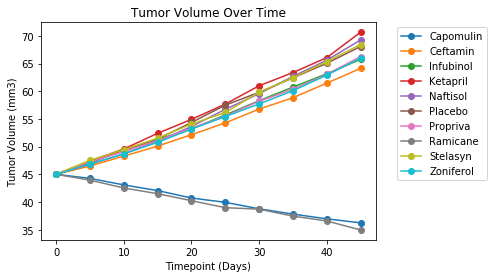

In [189]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(1,1)
drug_pivot.plot(ax=ax, marker ='o')
# ax.errorbar(group_drug_df["Timepoint"], group_drug_df["Tumor Volume (mm3)"], drug_stderr_df["Tumor Volume (mm3)"], marker ='o')

# Using labels=group_drug_df['Drug'].unique() seems to have produced accurate labels, but I can't tell why.
# I expected plt just iterated through the column and grabbed the labels in the order that it encountered them,
# because if I don't use .unique() all the lines will be labelled "Capomulin. 
# But it seems to have correctly matched each drug to its data points.
ax.legend(labels=group_drug_df['Drug'].unique(), bbox_to_anchor=(1.05, 1))

plt.title("Tumor Volume Over Time")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Save the Figure

plt.show()

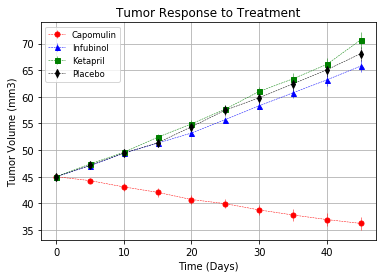

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [198]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
group_metSite = trial_data[["Drug", "Timepoint", "Metastatic Sites"]]
group_metSite = group_metSite.groupby(["Drug", "Timepoint"])
group_metSite.mean()

# Convert to DataFrame
metSite_df = pd.DataFrame(group_metSite.mean())
metSite_df = metSite_df.reset_index()

# Preview DataFrame
metSite_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [199]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metSite_stderr = group_metSite.sem()

# Convert to DataFrame
metSite_stderr_df = pd.DataFrame(metSite_stderr)
metSite_stderr_df = metSite_stderr_df.reset_index()

# Preview DataFrame
metSite_stderr_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [203]:
# Minor Data Munging to Re-Format the Data Frames
metSite_pivot = metSite_df.pivot_table(index="Timepoint", columns="Drug")
metSite_stderr_pivot = metSite_stderr_df.pivot_table(index="Timepoint", columns="Drug")

# Preview that Reformatting worked
metSite_pivot

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


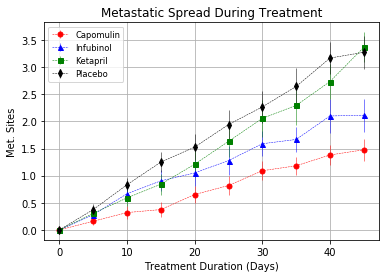

## Survival Rates

In [213]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
group_mouseCount = trial_data[["Drug", "Timepoint", "Mouse ID"]]
group_mouseCount = group_mouseCount.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
mouseCount_df = pd.DataFrame(group_mouseCount.count())
mouseCount_df = mouseCount_df.reset_index()

# Preview DataFrame
mouseCount_df.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [214]:
# Minor Data Munging to Re-Format the Data Frames
mouseCount_pivot = mouseCount_df.pivot_table(index="Timepoint", columns="Drug")

# Preview the Data Frame
mouseCount_pivot

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   
25               22       18        18       19       18      17       14   
30               22       16        17       18       15      15       13   
35               22       14        12       17       15      14       10   
40               21       14        10       15       15      12        9   
45               21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

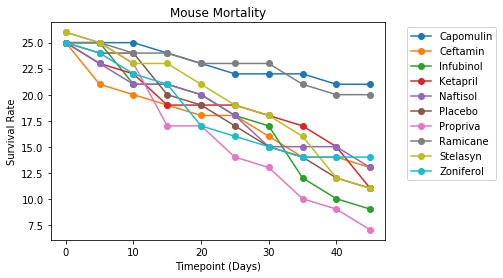

In [216]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots(1,1)
mouseCount_pivot.plot(ax=ax, marker ='o')

ax.legend(labels=group_drug_df['Drug'].unique(), bbox_to_anchor=(1.05, 1))

plt.title("Mouse Mortality")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Survival Rate")

# Save the Figure

# Show the Figure
plt.show()

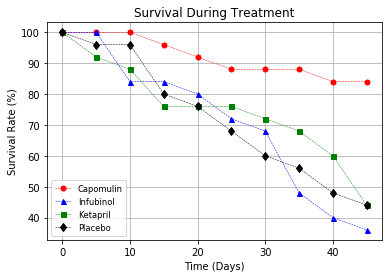

## Summary Bar Graph

In [228]:
# Calculate the percent changes for each drug
group_drug_df.groupby["Drug"].apply(mean)

# for drug in drugs:
    
# drug_hchange = group_drug_df[""]
# Display the data to confirm


TypeError: 'method' object is not subscriptable

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

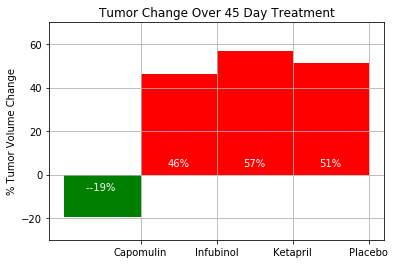